# Logistic Regression

Logistic Regression is used for classification using a "linear" decision boundary. 

First, it looks for linear decision boundaries between the samples of different classes. Then, the logistic function  $\sigma(\cdot)$ is used to get the probability of belongingness to each class defined with respect to the decision boundaries. 

The logistic function is:
$$\sigma(z) =  \frac{1}{1+ e^{-z}} $$

The output probability of belongingness to a class that can be suitably thresholded to get hard classification


## Prepare data
The data has 4 input-features and 3 output-classes. For simplicity we will use only two features: sepal-length and sepal-width (both in cm) and two output classes: Iris Setosa and Iris Versicolour.

In [64]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris= datasets.load_iris()
x = iris.data[:, :2] # choosing only first two features
y = iris.target

# taking 100 samples. First 50 -> class 0 and second 50 -> class 1
x= x[:100]
y= y[:100] 
no_of_samples= 100



## Splitting the data

In [65]:
# train - 70, test-15, validation -15
random_indices = np.random.permutation(no_of_samples)

# training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]

# validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]

# test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]


print (len(x_train))
print (len(x_test))
print (len(x_val))

70
15
15


## Visualizing the data

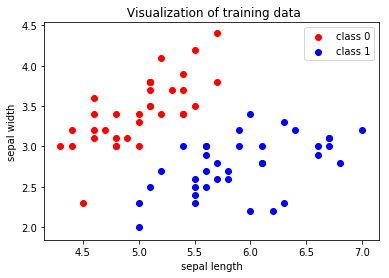

In [66]:
# y will have 0 for class 0 and 1 for class 1. so we will be using np.zeros and np.ones to represent the target y variables

x_class_0 = np.asmatrix( [x_train[i]  for i in range(len(x_train))   if y_train[i]==0])
y_class_0 = np.zeros((x_class_0.shape[0]),  dtype= np.int)

x_class_1 = np.asmatrix( [x_train[i]  for i in range(len(x_train))  if y_train[i]==1 ])
y_class_1 = np.ones( (x_class_1.shape[0]),  dtype= np.int)

plt.scatter([x_class_0[:,0]], [x_class_0[:,1]],color='red')
plt.scatter( [x_class_1[:,0]], [x_class_1[:,1]],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title(' Visualization of training data')
plt.show()

## Fitting logistic regression model
we fit a linear decision boundary through the feature space that separates the two classes well.


In [67]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((x_class_0,x_class_1),axis=0)
full_Y = np.concatenate((y_class_0,y_class_1),axis=0)
model.fit(full_X,full_Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


## Displaying the decision boundary
Plot the decision boundary. For that, we will assign a color to each
point in the mesh [x_min, m_max]x[y_min, y_max].

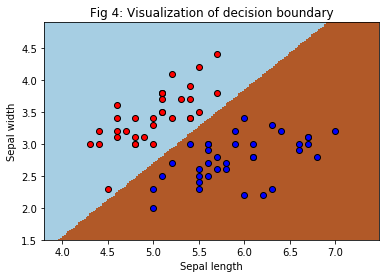

In [68]:
h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter([x_class_0[:, 0]], [x_class_0[:, 1]], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter([x_class_1[:, 0]], [x_class_1[:, 1]], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

## Evaluate the model

In [69]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0]) ]
validation_misclassification_percentage= 0

for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!= y_val[i]:
        validation_misclassification_percentage += 1

print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')

validation misclassification percentage = 0 %
test misclassification percentage = 0.0 %
